In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss

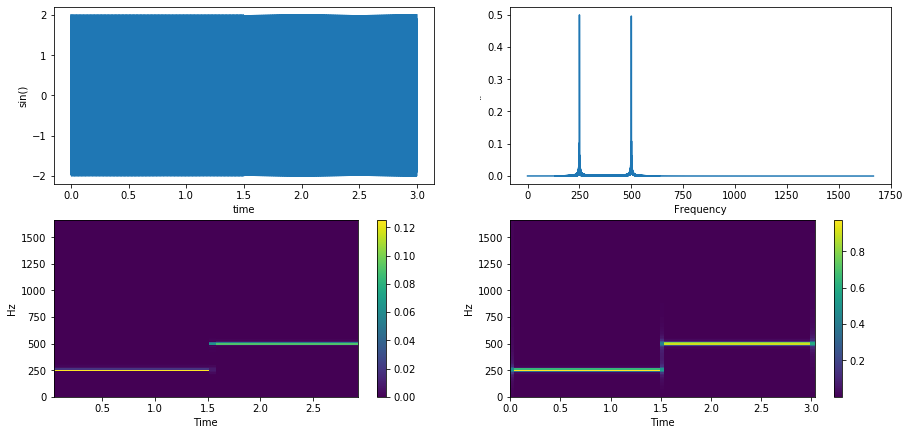

In [17]:
N = 10000 # number of sampled points
sss = 0 # start of time intervall
se = 3 # end of time intervall
amp = 2 * 0.5 # 1
fs = N/se # Sampling frequency (sampled points per time unit)
time = np.linspace(0,se,N)  # time points
freq = 500
y= 2*np.cos(np.pi*2*freq*time)*(time>1.5)+2*np.cos(np.pi*freq*time)*(time<1.5)
ftime = np.linspace(0,se*fs/2,N//2)/3 # frequencies
fy = np.fft.fft(y)[:len(y)//2]/len(y) # fourier transform of y
f, t, Z = ss.spectrogram(y, fs) # sliding window of y
ff,tt,ZZ = ss.stft(y,fs)

plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
plt.plot(time,y)
plt.xlabel("time")
plt.ylabel("sin()")
plt.subplot(4,2,2)
plt.xlabel("Frequency")
plt.ylabel("..")
plt.plot(ftime,np.abs(fy))
plt.subplot(4,2,3)
plt.pcolormesh(t,f,Z)
plt.colorbar()
plt.ylabel('Hz')
plt.xlabel('Time')
plt.subplot(4,2,4)
plt.pcolormesh(tt,ff,np.abs(ZZ))
plt.colorbar()
plt.ylabel('Hz')
plt.xlabel('Time')

plt.show()



In [18]:
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'


from osgeo import gdal
from scipy import fftpack
import numpy.linalg as npl

gdal.UseExceptions()
ds = gdal.Open(Tifpath)
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())

ds_target1 = np.zeros(len(ds_band1[1000,:]))
ds_target3 = np.zeros(len(ds_band3[1000,:]))

Ny,Nx = np.shape(ds_band3)
x = np.linspace(0,Nx*5,Nx)
y = np.linspace(0,Ny*5,Ny)


In [35]:

ls = 900
le = 920
for i in range(ls,le):
    ds_target1 = ds_band1[i,:] + ds_target1
    ds_target3 = ds_band3[i,:] + ds_target3
ds_target1 = ds_target1/(le-ls)
ds_target3 = ds_target3/(le-ls)
N = len(ds_target1)
length = N*5 
fs = N/length

x = np.linspace(0,length,N)
xf = np.linspace(0,length*fs/2,N//2)/length
fy = fftpack.fft(ds_target1)[:N//2]/N
fy2 = fftpack.fft(ds_target3)[:N//2]/N



<ipython-input-37-7772ee87b880>:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,np.log(ds_target1)*10,label="band 1")
<ipython-input-37-7772ee87b880>:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,np.log(ds_target3)*10, label = "band 3")


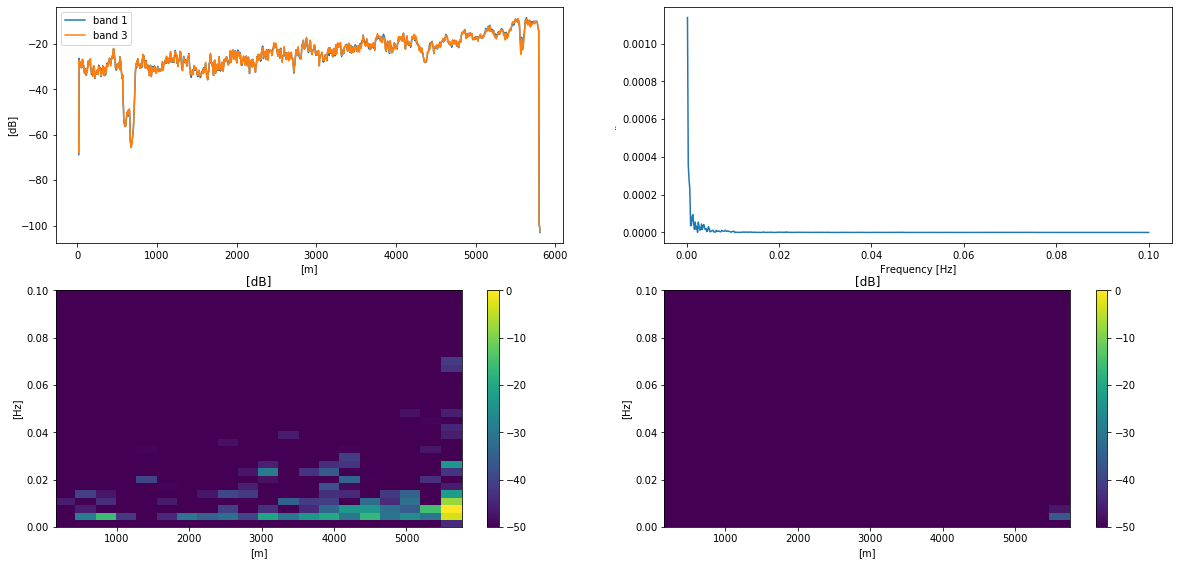

In [37]:
j = ds_target1-ds_target3
nf = 2**6
f, t, Z = ss.spectrogram(ds_target1, fs,nperseg=nf)
ff, tt, ZZ = ss.spectrogram(j, fs,nperseg=nf)
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.plot(x,np.log(ds_target1)*10,label="band 1")
plt.plot(x,np.log(ds_target3)*10, label = "band 3")
plt.xlabel("[m]")
plt.ylabel("[dB]")
plt.legend()
plt.subplot(4,2,2)
plt.xlabel("Frequency [Hz]")
plt.ylabel("..")
plt.plot(xf[1:],np.abs(fy[1:])*np.abs(fy2[1:]))
plt.subplot(4,2,3)
plt.pcolormesh(t,f,np.log(Z)*10,vmin=-50,vmax=0)
plt.ylabel('[Hz]')
plt.xlabel('[m]')
plt.colorbar()
plt.title("[dB]")

plt.subplot(4,2,4)
plt.pcolormesh(tt,ff,np.log(np.abs(ZZ))*10,vmin=-50,vmax=0)
plt.colorbar()
plt.title("[dB]")
plt.ylabel('[Hz]')
plt.xlabel('[m]')


plt.show()



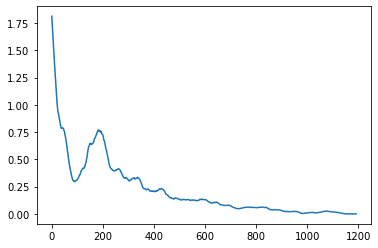

In [29]:

f1 = np.abs(fftpack.fft(j))
f2 =np.abs( fftpack.fft(ds_target3))
h  = np.abs(f1*f1)




cc = ss.correlate(ds_target1, ds_target3)
cc = ss.correlate(j,j)
cc  = cc[len(cc)//2:]
plt.plot(cc)
#plt.plot(h)
plt.show()

